# ----------------------------- LOGESTIC REGRESSION -----------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Utility function to drop rows
def dropRows(row_nums,df):
    df.drop(axis=0,index=row_nums,inplace=True)

In [3]:
dia = pd.read_csv('diabetes.csv')
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Checking for Corelation between features : 

<AxesSubplot:>

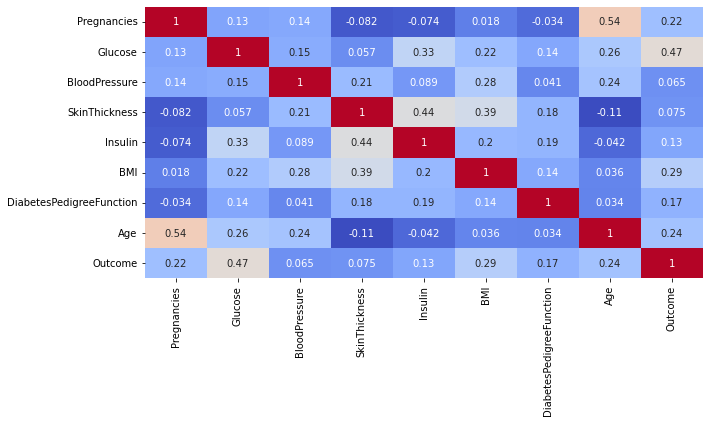

In [5]:
fig = plt.figure(figsize=(10,5))
sns.heatmap(dia.corr(),cbar=False,annot=True,cmap="coolwarm")

#### INFERENCE : 
There seems to be no extreem positive or negative corelation between feature, hence not dropping any feature

## Checking for NULL Values : 

In [6]:
dia.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### INFERENCE :
No missing data to deal with

In [7]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

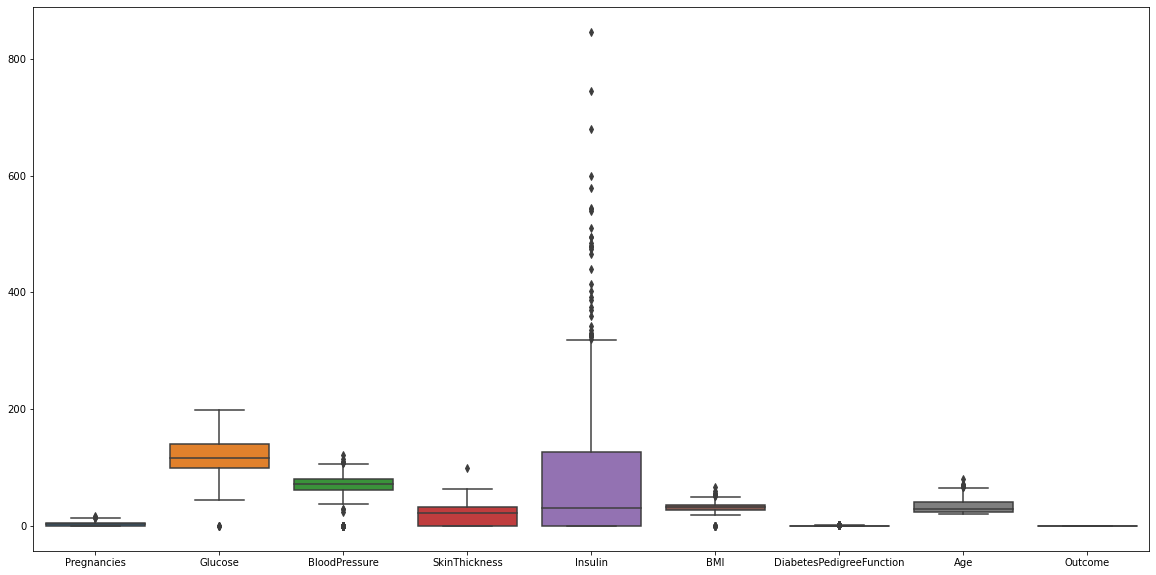

In [8]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(data=dia)

##### BMI cannot  be zero, heace dropping them as they are outliers

In [9]:
row_nums = dia[dia['BMI']==0].index
print(row_nums,"\nCount : ",len(row_nums))

Int64Index([9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706], dtype='int64') 
Count :  11


In [10]:
dropRows(row_nums,dia)

##### Glucose cannot  be zero, heace dropping them as they are outliers

In [11]:
row_nums = dia[dia['Glucose']==0].index
print(row_nums,"\nCount : ",len(row_nums))

Int64Index([75, 182, 342, 349, 502], dtype='int64') 
Count :  5


In [12]:
dropRows(row_nums,dia)

In [13]:
len(dia) # Total number of Rows in the Dataset

752

##### Other features like BloodPressure, SkinThickness, Insulin cannot be 0 but dropping them will result in loss of data, hence we shall replace them with the median

In [14]:
row_nums = dia[dia['BloodPressure']==0].index
print(row_nums,"\nCount : ",len(row_nums)) # approx 5% of data set size

Int64Index([  7,  15,  78, 172, 193, 222, 261, 266, 269, 300, 332, 336, 347,
            357, 430, 435, 453, 468, 484, 533, 535, 589, 601, 604, 619, 643,
            697, 703],
           dtype='int64') 
Count :  28


In [15]:
row_nums = dia[dia['SkinThickness']==0].index
print(row_nums,"\nCount : ",len(row_nums)) # approx 30% of data set size

Int64Index([  2,   5,   7,  10,  11,  12,  15,  17,  21,  22,
            ...
            734, 739, 743, 749, 750, 757, 758, 759, 762, 766],
           dtype='int64', length=218) 
Count :  218


In [16]:
row_nums = dia[dia['Insulin']==0].index
print(row_nums,"\nCount : ",len(row_nums)) # approx 50% of data set size

Int64Index([  0,   1,   2,   5,   7,  10,  11,  12,  15,  17,
            ...
            754, 756, 757, 758, 759, 761, 762, 764, 766, 767],
           dtype='int64', length=360) 
Count :  360


##### Replace by Median Values : 

In [17]:
for col in ['Insulin','SkinThickness','BloodPressure']:
    dia[col]=dia[col].apply(lambda x : dia[col].median() if x==0 else x)

## Train and Test Data Preparation : 

In [18]:
dia.sort_values('Outcome',inplace=True)
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
385,1,119,54.0,13.0,50.0,22.3,0.205,24,0
466,0,74,52.0,10.0,36.0,27.8,0.269,22,0
467,0,97,64.0,36.0,100.0,36.8,0.600,25,0
469,6,154,78.0,41.0,140.0,46.1,0.571,27,0
470,1,144,82.0,40.0,39.0,41.3,0.607,28,0


In [19]:
dia.reset_index(drop=True,inplace=True)
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,119,54.0,13.0,50.0,22.3,0.205,24,0
1,0,74,52.0,10.0,36.0,27.8,0.269,22,0
2,0,97,64.0,36.0,100.0,36.8,0.600,25,0
3,6,154,78.0,41.0,140.0,46.1,0.571,27,0
4,1,144,82.0,40.0,39.0,41.3,0.607,28,0


In [20]:
dia.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
747,5,158,84.0,41.0,210.0,39.4,0.395,29,1
748,3,107,62.0,13.0,48.0,22.9,0.678,23,1
749,0,135,68.0,42.0,250.0,42.3,0.365,24,1
750,4,109,64.0,44.0,99.0,34.8,0.905,26,1
751,6,148,72.0,35.0,39.0,33.6,0.627,50,1


In [21]:
# Having Index variables so as to have a proper balance of classes in the train and test set

class_0_count = sum(dia['Outcome']==0)
class_1_count = sum(dia['Outcome']==1)
total_count = len(dia)
class_0_count,class_1_count,total_count

(488, 264, 752)

In [22]:
class_1_start_index = class_0_count
class_1_start_index

488

In [23]:
split_size = 0.8 # Size of Train and Test split

In [24]:
X = dia.drop(axis=1,columns='Outcome')
# X['Bias'] = np.ones(len(X))
Y = dia['Outcome']

In [25]:
X_Train = X[0:int(split_size*class_0_count)].append(X[class_1_start_index:class_1_start_index+int(split_size*class_1_count)])
Y_Train = Y[0:int(split_size*class_0_count)].append(Y[class_1_start_index:class_1_start_index+int(split_size*class_1_count)])


C:\Users\nsimh\AppData\Local\Temp\ipykernel_26496\4125735869.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_Train = X[0:int(split_size*class_0_count)].append(X[class_1_start_index:class_1_start_index+int(split_size*class_1_count)])
C:\Users\nsimh\AppData\Local\Temp\ipykernel_26496\4125735869.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Y_Train = Y[0:int(split_size*class_0_count)].append(Y[class_1_start_index:class_1_start_index+int(split_size*class_1_count)])


In [26]:
X_Test = X[int(split_size*class_0_count):class_1_start_index].append(X[class_1_start_index+int(split_size*class_1_count):])
Y_Test = Y[int(split_size*class_0_count):class_1_start_index].append(Y[class_1_start_index+int(split_size*class_1_count):])

C:\Users\nsimh\AppData\Local\Temp\ipykernel_26496\491274760.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_Test = X[int(split_size*class_0_count):class_1_start_index].append(X[class_1_start_index+int(split_size*class_1_count):])
C:\Users\nsimh\AppData\Local\Temp\ipykernel_26496\491274760.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Y_Test = Y[int(split_size*class_0_count):class_1_start_index].append(Y[class_1_start_index+int(split_size*class_1_count):])


In [27]:
X_Train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,119,54.0,13.0,50.0,22.3,0.205,24
1,0,74,52.0,10.0,36.0,27.8,0.269,22
2,0,97,64.0,36.0,100.0,36.8,0.600,25
3,6,154,78.0,41.0,140.0,46.1,0.571,27
4,1,144,82.0,40.0,39.0,41.3,0.607,28
...,...,...,...,...,...,...,...,...
694,3,132,80.0,23.0,39.0,34.4,0.402,44
695,11,111,84.0,40.0,39.0,46.8,0.925,45
696,3,176,86.0,27.0,156.0,33.3,1.154,52
697,8,143,66.0,23.0,39.0,34.9,0.129,41


In [28]:
Y_Train

0      0
1      0
2      0
3      0
4      0
      ..
694    1
695    1
696    1
697    1
698    1
Name: Outcome, Length: 601, dtype: int64

In [29]:
X_Test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
390,4,151,90.0,38.0,39.0,29.7,0.294,36
391,0,113,80.0,16.0,39.0,31.0,0.874,21
392,7,102,74.0,40.0,105.0,37.2,0.204,45
393,0,114,80.0,34.0,285.0,44.2,0.167,27
394,2,100,64.0,23.0,39.0,29.7,0.368,21
...,...,...,...,...,...,...,...,...
747,5,158,84.0,41.0,210.0,39.4,0.395,29
748,3,107,62.0,13.0,48.0,22.9,0.678,23
749,0,135,68.0,42.0,250.0,42.3,0.365,24
750,4,109,64.0,44.0,99.0,34.8,0.905,26


In [30]:
Y_Test

390    0
391    0
392    0
393    0
394    0
      ..
747    1
748    1
749    1
750    1
751    1
Name: Outcome, Length: 151, dtype: int64

 Converting into Numpy array for computation : 

In [31]:
X_Test=np.array(X_Test)
X_Test

array([[  4.   , 151.   ,  90.   , ...,  29.7  ,   0.294,  36.   ],
       [  0.   , 113.   ,  80.   , ...,  31.   ,   0.874,  21.   ],
       [  7.   , 102.   ,  74.   , ...,  37.2  ,   0.204,  45.   ],
       ...,
       [  0.   , 135.   ,  68.   , ...,  42.3  ,   0.365,  24.   ],
       [  4.   , 109.   ,  64.   , ...,  34.8  ,   0.905,  26.   ],
       [  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ]])

In [32]:
Y_Test = np.array([Y_Test])
Y_Test

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
      dtype=int64)

In [33]:
Y_Test = Y_Test.reshape(len(Y_Test[0]),1)

In [34]:
X_Train = np.array(X_Train)
X_Train

array([[1.000e+00, 1.190e+02, 5.400e+01, ..., 2.230e+01, 2.050e-01,
        2.400e+01],
       [0.000e+00, 7.400e+01, 5.200e+01, ..., 2.780e+01, 2.690e-01,
        2.200e+01],
       [0.000e+00, 9.700e+01, 6.400e+01, ..., 3.680e+01, 6.000e-01,
        2.500e+01],
       ...,
       [3.000e+00, 1.760e+02, 8.600e+01, ..., 3.330e+01, 1.154e+00,
        5.200e+01],
       [8.000e+00, 1.430e+02, 6.600e+01, ..., 3.490e+01, 1.290e-01,
        4.100e+01],
       [0.000e+00, 1.620e+02, 7.600e+01, ..., 5.320e+01, 7.590e-01,
        2.500e+01]])

In [35]:
Y_Train = np.array([Y_Train])
Y_Train

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [36]:
Y_Train = Y_Train.reshape(len(Y_Train[0]),1)


In [37]:
X_Train.shape,Y_Train.shape,X_Test.shape,Y_Test.shape

((601, 8), (601, 1), (151, 8), (151, 1))

### IMPLEMENTATION : 


In [38]:
#Class that handels the metric for the data

class metrics:
    tp=0
    tn=0
    fp=0
    fn=0
    
    def __init__(self,y,y_pred):
        for i in range(len(y)):
            if y[i] == 1 and y_pred[i] == 1:
                 self.tp += 1
            elif y[i] == 1 and y_pred[i] == 0:
                 self.fn += 1
            elif y[i] == 0 and y_pred[i] == 1:
                 self.fp += 1
            elif y[i] == 0 and y_pred[i] == 0:
                 self.tn += 1
                    
    def calc_acc(self):
        return (self.tp+self.tn)/(self.tp+self.tn+self.fp+self.fn)
    
    def calc_F1_score(self):
        precision = self.tp/(self.tp+self.fp)
        recall = self.tp/(self.tp+self.fn)
        f1_score = 2*precision*recall/(precision+recall)
        return f1_score


In [39]:
# Class implementing Logestic Regression

class LogesticRegression:
    W=0 #Weight Matrix
    B=0 #Bias
    
    def sigmoid(self,Z):
        return (1/(1+np.exp(-Z)))
    
    def logistic_Regression(self,X,Y,step_size=0.00019,epochs=100000):
        self.W = np.zeros((X.shape[0],1))
        X_dim = X.shape[1]
        acc = list()
        cost_list = list()
        for i in range(epochs):
            Z = np.dot(self.W.T,X)+self.B
        
            A = self.sigmoid(Z)
            
            cost = -(1/X_dim) * np.sum( np.log(A)*Y+ (1-Y)*np.log(1-A))
            
            W_der = (1/X_dim)*np.dot(A-Y,X.T)
            B_der = (1/X_dim)*np.sum(A-Y)
            
            self.W = self.W - step_size*W_der.T
            self.B = self.B - step_size*B_der
            
            Y_Pred = self.predict_class(X)
            metric = metrics(Y[0],Y_Pred)
            
            acc.append(metric.calc_acc()*100)
            cost_list.append(cost)
            
        sns.set_style("darkgrid")
        fig=plt.figure(figsize=(10,6))
        axes = fig.add_axes([0,0,1,1])
        axes.plot(range(epochs),acc)
        axes.set_xlabel(" Epochs")
        axes.set_ylabel(" Accuracy ")
        axes.set_title("Logestic Regression_Training Accuracy")
        
        fig=plt.figure(figsize=(10,6))
        axes = fig.add_axes([0,0,1,1])
        axes.plot(range(epochs),cost_list)
        axes.set_xlabel(" Epochs")
        axes.set_ylabel(" Cost ")
        axes.set_title("Logestic Regression_Cost")


    def predict_class(self,X):
        Z = np.dot(self.W.T , X) + self.B
        Y_Pred = list()
        y_pred = self.sigmoid(Z)
        for ele in y_pred[0]:
            if ele>0.5:
                Y_Pred.append(1)
            else:
                Y_Pred.append(0)
        return Y_Pred

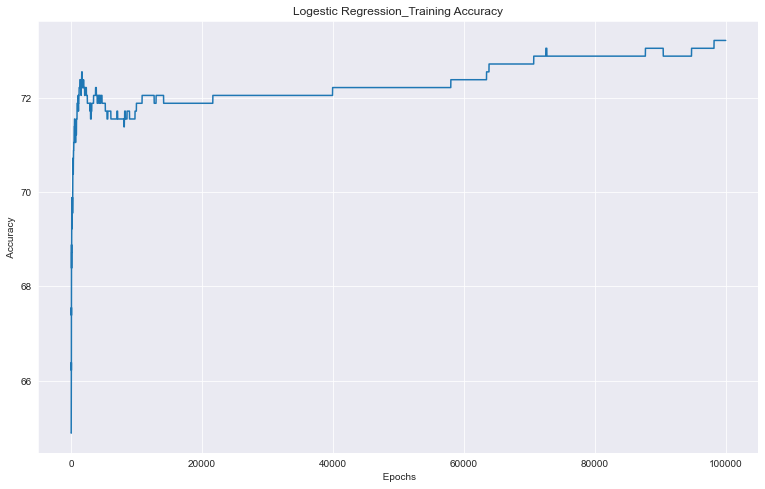

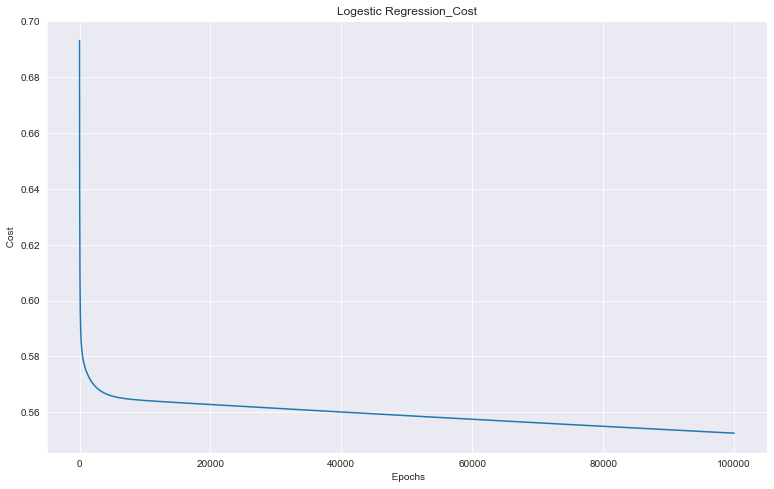

In [40]:
logreg = LogesticRegression()

logreg.logistic_Regression(X_Train.T,Y_Train.T)

In [41]:
Y_Pred = logreg.predict_class(X_Test.T)

In [42]:
metric = metrics(Y_Test,Y_Pred) # Creting Metrics Object to access its methods

In [43]:
print("\n The Accuracy of the Model is : ", metric.calc_acc()*100,"%")
print("\n The F1 Score of the Model is : ", metric.calc_F1_score()*100,"%")


 The Accuracy of the Model is :  65.56291390728477 %

 The F1 Score of the Model is :  45.833333333333336 %


### INFERENCE :
The accuracy and f1 score and not upto the mark. Need to tweek the model for improvement